This notebook comes mostly from following a tutorial from https://www.kaggle.com/code/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy

In [11]:
#load packages
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd 
print("pandas version: {}". format(pd.__version__))
import matplotlib 
print("matplotlib version: {}". format(matplotlib.__version__))
import numpy as np 
print("NumPy version: {}". format(np.__version__))
import scipy as sp 
print("SciPy version: {}". format(sp.__version__)) 
import IPython
from IPython import display
print("IPython version: {}". format(IPython.__version__)) 
import sklearn 
print("scikit-learn version: {}". format(sklearn.__version__))

#misc libraries
import random
import time

#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)


Python version: 3.11.2 (tags/v3.11.2:878ead1, Feb  7 2023, 16:38:35) [MSC v.1934 64 bit (AMD64)]
pandas version: 2.2.0
matplotlib version: 3.8.2
NumPy version: 1.26.3
SciPy version: 1.12.0
IPython version: 8.20.0
scikit-learn version: 1.4.0
-------------------------


In [12]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

In [13]:
# import data

data_raw = pd.read_csv('titanictrain.csv')
data_val = pd.read_csv('titanictest.csv')

# make a copy of the data

data1 = data_raw.copy(deep = True)

data_cleaner = [data1, data_val] # to clean both datasets at once

data_raw.info()
data_raw.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S
613,614,0,3,"Horgan, Mr. John",male,NaN,0,0,370377,7.7500,NaN,Q
763,764,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.0,1,2,113760,120.0000,B96 B98,S
427,428,1,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19.0,0,0,250655,26.0000,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0000,NaN,S
279,280,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.2500,NaN,S
293,294,0,3,"Haas, Miss. Aloisia",female,24.0,0,0,349236,8.8500,NaN,S
343,344,0,2,"Sedgwick, Mr. Charles Frederick Waddington",male,25.0,0,0,244361,13.0000,NaN,S
544,545,0,1,"Douglas, Mr. Walter Donald",male,50.0,1,0,PC 17761,106.4250,C86,C
628,629,0,3,"Bostandyeff, Mr. Guentcho",male,26.0,0,0,349224,7.8958,NaN,S


In [14]:
# check missing values

print('NAs in train:\n', data1.isnull().sum())
print('NAs in test:\n', data_val.isnull().sum())

data_raw.describe(include = 'all')


NAs in train:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
NAs in test:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### Data Cleaning

In [20]:
data1['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [16]:
# dealing with NAs

for dataset in data_cleaner:
    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)

# drop columns
to_drop = ['PassengerId', 'Cabin', 'Ticket']
data1.drop(to_drop, axis = 1, inplace = True)

# check NAs

print('NAs in train:\n', data1.isnull().sum())
print('NAs in test:\n', data_val.isnull().sum())

NAs in train:
 Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
NAs in test:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [21]:
# create new features based on existing ones

for dataset in data_cleaner:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1 # family size based on the number of siblings, spouses, parents and children
    dataset['IsAlone'] = 1 # initialize to yes/1 is alone
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0 # update to no/0 if family size is greater than 1
    dataset['Title'] = dataset['Name'].str.split(', ', expand = True)[1].str.split('.', expand = True)[0] # keep only the title from the name
    
    # bin the continuous variables (easier interpretation, good for outliers, enhanced generalization...)
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)
    # cut vs qcut: cut gives equal sized bins, qcut gives equal number of data points in each bin

# clean up rare titles

# create a true or false series based on the counts
titles = (data1['Title'].value_counts() < 10) # 10 is the common threshold

# apply the mask to the titles
data1['Title'] = data1['Title'].apply(lambda x: 'Misc' if titles.loc[x] == True else x) # places Misc if title is rare
print(data1['Title'].value_counts())

# preview data

data1.info()
data_val.info()
data1.sample(10)



Title
Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    int64   
 1   Pclass      891 non-null    int64   
 2   Name        891 non-null    object  
 3   Sex         891 non-null    object  
 4   Age         891 non-null    float64 
 5   SibSp       891 non-null    int64   
 6   Parch       891 non-null    int64   
 7   Fare        891 non-null    float64 
 8   Embarked    891 non-null    object  
 9   FamilySize  891 non-null    int64   
 10  IsAlone     891 non-null    int64   
 11  Title       891 non-null    object  
 12  FareBin     891 non-null    category
 13  AgeBin      891 non-null    category
dtypes: category(2), float64(2), int64(6), object(4)
memory usage: 85.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIn

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin
362,0,3,"Barbara, Mrs. (Catherine David)",female,45.0,0,1,14.4542,C,2,0,Mrs,"(7.91, 14.454]","(32.0, 48.0]"
580,1,2,"Christy, Miss. Julie Rachel",female,25.0,1,1,30.0000,S,3,0,Miss,"(14.454, 31.0]","(16.0, 32.0]"
879,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,83.1583,C,2,0,Mrs,"(31.0, 512.329]","(48.0, 64.0]"
751,1,3,"Moor, Master. Meier",male,6.0,0,1,12.4750,S,2,0,Master,"(7.91, 14.454]","(-0.08, 16.0]"
666,0,2,"Butler, Mr. Reginald Fenton",male,25.0,0,0,13.0000,S,1,1,Mr,"(7.91, 14.454]","(16.0, 32.0]"
261,1,3,"Asplund, Master. Edvin Rojj Felix",male,3.0,4,2,31.3875,S,7,0,Master,"(31.0, 512.329]","(-0.08, 16.0]"
151,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,66.6000,S,2,0,Mrs,"(31.0, 512.329]","(16.0, 32.0]"
560,0,3,"Morrow, Mr. Thomas Rowan",male,28.0,0,0,7.7500,Q,1,1,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
527,0,1,"Farthing, Mr. John",male,28.0,0,0,221.7792,S,1,1,Mr,"(31.0, 512.329]","(16.0, 32.0]"
783,0,3,"Johnston, Mr. Andrew G",male,28.0,1,2,23.4500,S,4,0,Mr,"(14.454, 31.0]","(16.0, 32.0]"


In [22]:
# encode variables

label = LabelEncoder()
for dataset in data_cleaner:
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])

# define the target variable (y)
y = ['Survived']

# define the x variables

data1_x = ['Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] # original features
data1_x_calc = ['Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'SibSp', 'Parch', 'Age', 'Fare'] # coded for calculation

data1_xy = y + data1_x
print('Original X Y: ', data1_xy, '\n')

# define x variables with bin features

data1_x_bin = ['Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code'] # continuous are binned
data1_xy_bin = y + data1_x_bin
print('Bin X Y: ', data1_xy_bin, '\n')

# define x and y variables for dummy features original

data1_dummy = pd.get_dummies(data1[data1_x])
data1_x_dummy = data1_dummy.columns.tolist()
data1_xy_dummy = y + data1_x_dummy
print('Dummy X Y: ', data1_xy_dummy, '\n')

# double check all of the dummy variables are there

data1_dummy.head()

Original X Y:  ['Survived', 'Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] 

Bin X Y:  ['Survived', 'Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code'] 

Dummy X Y:  ['Survived', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Misc', 'Title_Miss', 'Title_Mr', 'Title_Mrs'] 



,Pclass,SibSp,Parch,Age,Fare,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
0,3,1,0,22.0,7.2500,2,0,False,True,False,False,True,False,False,False,True,False
1,1,1,0,38.0,71.2833,2,0,True,False,True,False,False,False,False,False,False,True
2,3,0,0,26.0,7.9250,1,1,True,False,False,False,True,False,False,True,False,False
3,1,1,0,35.0,53.1000,2,0,True,False,False,False,True,False,False,False,False,True
4,3,0,0,35.0,8.0500,1,1,False,True,False,False,True,False,False,False,True,False


In [24]:
# double check cleaned data

print('NAs in train: \n', data1.isnull().sum())
print(data1.info())
print('-'*10)

print('NAs in test: \n', data_val.isnull().sum())
print(data_val.info())
print('-'*10)


NAs in train: 
 Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
FamilySize       0
IsAlone          0
Title            0
FareBin          0
AgeBin           0
Sex_Code         0
Embarked_Code    0
Title_Code       0
AgeBin_Code      0
FareBin_Code     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Survived       891 non-null    int64   
 1   Pclass         891 non-null    int64   
 2   Name           891 non-null    object  
 3   Sex            891 non-null    object  
 4   Age            891 non-null    float64 
 5   SibSp          891 non-null    int64   
 6   Parch          891 non-null    int64   
 7   Fare           891 non-null    float64 
 8   Embarked       891 non-null    object  
 9   Famil

In [25]:
# split all datasets: the one for model calculation, the one with bins and the one with dummy variables

train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split(data1[data1_x_calc], data1[y], random_state = 0)
train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin = model_selection.train_test_split(data1[data1_x_bin], data1[y] , random_state = 0)
train1_x_dummy, test1_x_dummy, train1_y_dummy, test1_y_dummy = model_selection.train_test_split(data1_dummy[data1_x_dummy], data1[y], random_state = 0)


print("Data1 Shape: {}".format(data1.shape))
print("Train1 Shape: {}".format(train1_x.shape))
print("Test1 Shape: {}".format(test1_x.shape))

train1_x_bin.head()

Data1 Shape: (891, 19)
Train1 Shape: (668, 8)
Test1 Shape: (223, 8)


,Sex_Code,Pclass,Embarked_Code,Title_Code,FamilySize,AgeBin_Code,FareBin_Code
105,1,3,2,3,1,1,0
68,0,3,2,2,7,1,1
253,1,3,2,3,2,1,2
320,1,3,2,3,1,1,0
706,0,2,2,4,1,2,1


### EDA

Survival Correlation by: Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908
---------- 

Survival Correlation by: Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
---------- 

Survival Correlation by: Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009
---------- 

Survival Correlation by: Title
    Title  Survived
0  Master  0.575000
1    Misc  0.444444
2    Miss  0.697802
3      Mr  0.156673
4     Mrs  0.792000
---------- 

Survival Correlation by: SibSp
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
---------- 

Survival Correlation by: Parch
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000
---------- 

Survival Correlation by: FamilySize
   FamilySize  Survived
0           1  0.303538
1 

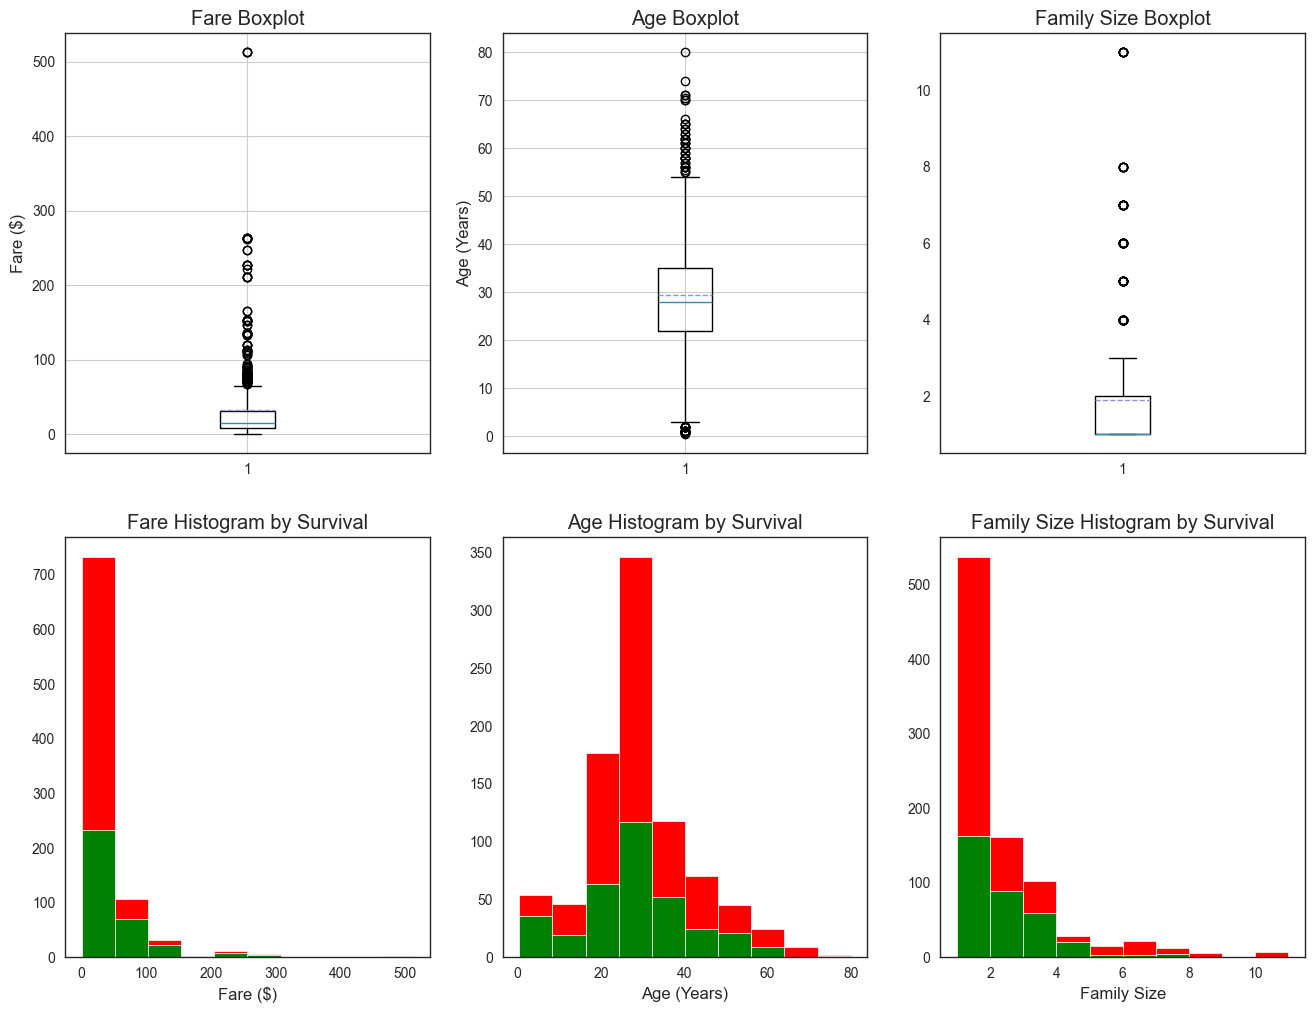

In [31]:
# correlation of !discrete! variables with the survival

# using group by (pivot table)
for x in data1_x:
    if data1[x].dtype != 'float64':
        print('Survival Correlation by:', x)
        print(data1[[x, y[0]]].groupby(x, as_index = False).mean())
        print('-'*10, '\n')

# using crosstabs

print(pd.crosstab(data1['Title'], data1[y[0]]))

# plots

plt.figure(figsize = [16,12])

plt.subplot(231)
plt.boxplot(x = data1['Fare'], showmeans = True, meanline = True)
plt.title('Fare Boxplot')
plt.ylabel('Fare ($)')
plt.grid(True)

plt.subplot(232)
plt.boxplot(x = data1['Age'], showmeans = True, meanline = True)
plt.title('Age Boxplot')
plt.ylabel('Age (Years)')
plt.grid(True)

plt.subplot(233)
plt.boxplot(x = data1['FamilySize'], showmeans = True, meanline = True)
plt.title('Family Size Boxplot')

plt.subplot(234)
plt.hist(x = [data1[data1['Survived'] == 1]['Fare'], data1[data1['Survived'] == 0]['Fare']], stacked = True, color = ['g', 'r'], label = ['Survived', 'Dead'])
plt.title('Fare Histogram by Survival')
plt.xlabel('Fare ($)')

plt.subplot(235)
plt.hist(x = [data1[data1['Survived'] == 1]['Age'], data1[data1['Survived'] == 0]['Age']], stacked = True, color = ['g', 'r'], label = ['Survived', 'Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age (Years)')

plt.subplot(236)
plt.hist(x = [data1[data1['Survived'] == 1]['FamilySize'], data1[data1['Survived'] == 0]['FamilySize']], stacked = True, color = ['g', 'r'], label = ['Survived', 'Dead'])
plt.title('Family Size Histogram by Survival')
plt.xlabel('Family Size')

plt.show()


<Axes: xlabel='FamilySize', ylabel='Survived'>

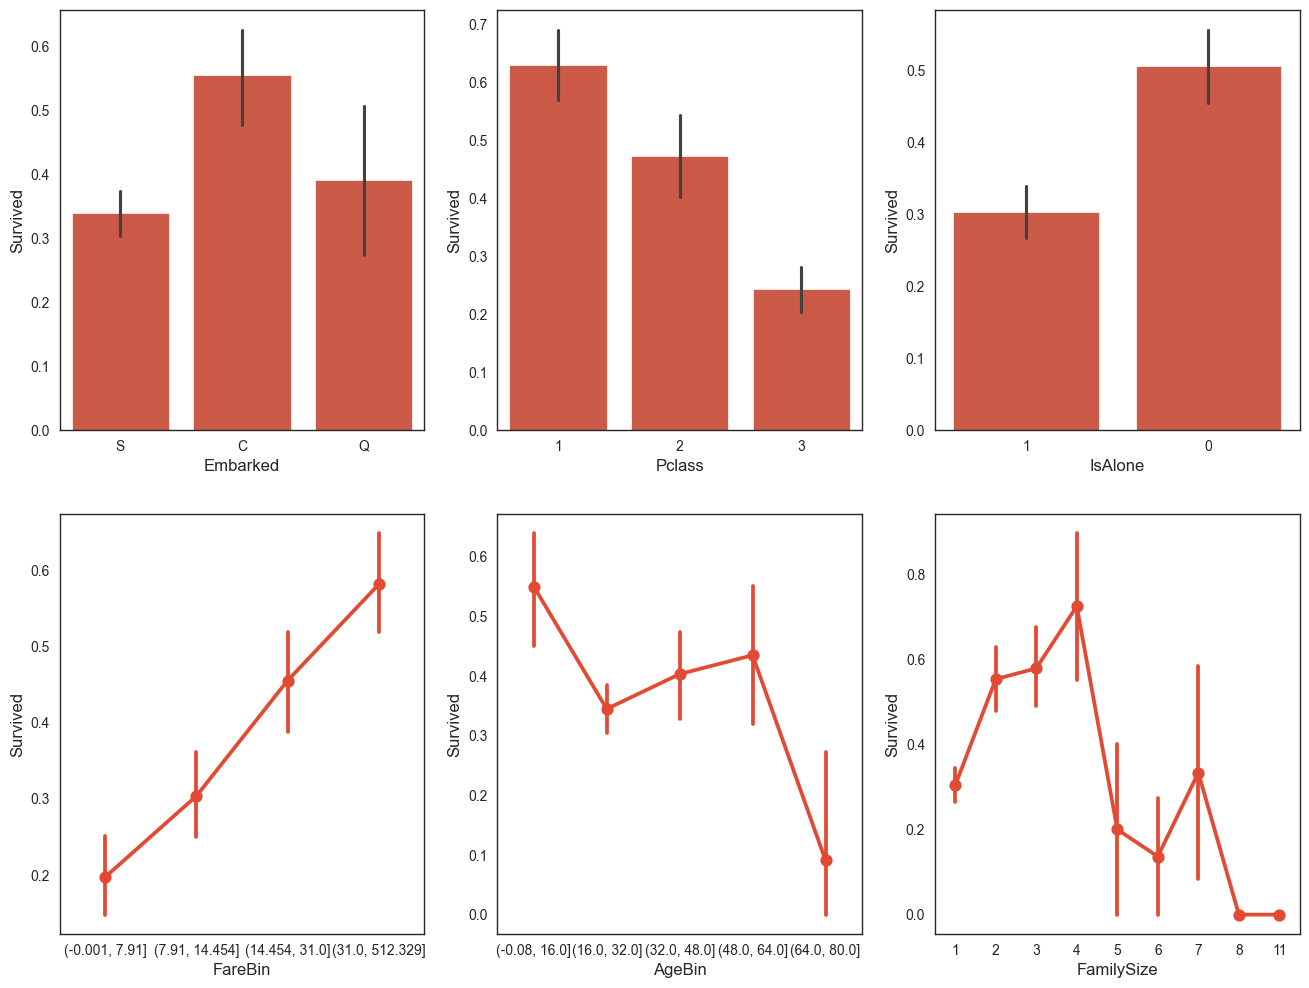

In [32]:
# correlation using seaborn

fig, saxis = plt.subplots(2, 3, figsize = (16,12))

sns.barplot(x = 'Embarked', y = 'Survived', data = data1, ax = saxis[0,0])
sns.barplot(x = 'Pclass', y = 'Survived', order = [1,2,3], data = data1, ax = saxis[0,1])
sns.barplot(x = 'IsAlone', y = 'Survived', order = [1,0], data = data1, ax = saxis[0,2])

sns.pointplot(x = 'FareBin', y = 'Survived', data = data1, ax = saxis[1,0])
sns.pointplot(x = 'AgeBin', y = 'Survived', data = data1, ax = saxis[1,1])
sns.pointplot(x = 'FamilySize', y = 'Survived', data = data1, ax = saxis[1,2])


Text(0.5, 1.0, 'Pclass vs Family Size Survival Comparison')

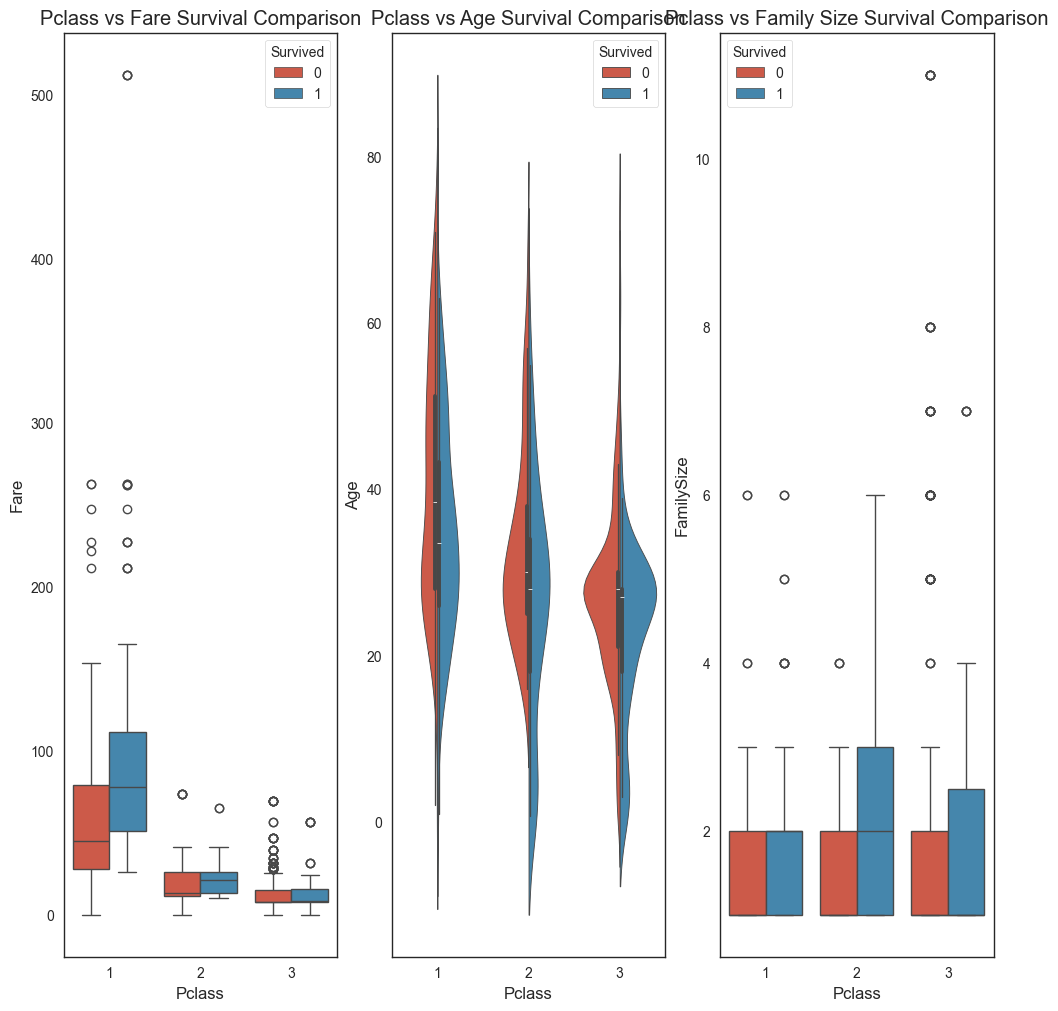

In [37]:
# class mattered in survival, lets compare it with other feature

fig, (axis1, axis2, axis3) = plt.subplots(1, 3, figsize = (12,12))

sns.boxplot(x = 'Pclass', y = 'Fare', hue = 'Survived', data = data1, ax = axis1)
axis1.set_title('Pclass vs Fare Survival Comparison')

sns.violinplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = data1, split = True, ax = axis2)
axis2.set_title('Pclass vs Age Survival Comparison')

sns.boxplot(x = 'Pclass', y = 'FamilySize', hue = 'Survived', data = data1, ax = axis3)
axis3.set_title('Pclass vs Family Size Survival Comparison')



more examples of graphs in the tutorial